In [1]:
with open("predictionswtags_indicw2v_ad0_3_hd_02_featd_0_2_lr6e-4_warmup500_s300_shuff100.txt", 'r', encoding="utf-8") as f:
    preds_warmup500 = f.read()

In [1]:
def get_text_from_line(file_path, start_line):
    with open(file_path, "r") as file:
        # Read all lines from the file
        lines = file.readlines()
    
    # Ensure the start_line is within the valid range
    if start_line < 0 or start_line >= len(lines):
        return "Error: start_line is out of range."
    
    # Extract the lines starting from the specified line number
    selected_lines = lines[start_line:]
    
    # Join the lines back into a single string if you need the result as text
    selected_text = ''.join(selected_lines)
    
    return selected_text

# Usage example
file_path = "your_text_file.txt"
start_line = 65856  # Start from line number 10 (remember it's 0-indexed)
selected_text = get_text_from_line("predictionswtags_indicw2v_ad0_3_hd_02_featd_0_2_lr6e-4_warmup500_s300_shuff100.txt", start_line)
#print(selected_text)


In [2]:
import re
import jiwer

In [7]:
pip install jiwer


Defaulting to user installation because normal site-packages is not writeable
  Using cached jiwer-3.0.4-py3-none-any.whl.metadata (2.6 kB)
Using cached jiwer-3.0.4-py3-none-any.whl (21 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
ref = re.findall(r'References: /(.*)', selected_text)
pred = re.findall(r'Prediction: (.*)', selected_text)

In [4]:
last_occurrence_index = preds_warmup500.rfind("लिबर ऑफिस impress में एक प्रस्तुति document बनाना और बुनियादी formatting के इस spoken tutorial में आपका स्वागत है")

In [5]:
last_occurrence_index

-1

In [13]:
#import jiwer
reference = ' '.join(ref[:100])  # Join the list elements into a single string
prediction = ' '.join(pred[:100])

# Process words and get the detailed word-level analysis
processed = jiwer.process_words(reference, prediction)

# Output the differences
print(processed)


WordOutput(references=[['लिबर', 'ऑफिस', '<cs>', 'impres', '</cs>', 'में', 'एक', 'प्रस्तुति', '<cs>', 'document', '</cs>', 'बनाना', 'और', 'बुनियादी', '<cs>', 'formating', '</cs>', 'के', 'इस', '<cs>', 'spoken', 'tutorial', '</cs>', 'में', 'आपका', 'स्वागत', 'है', 'इस', '<cs>', 'tutorial', '</cs>', 'में', 'हम', '<cs>', 'impres', 'window', '</cs>', 'के', 'भागों', 'के', 'बारे', 'में', 'सीखेंगे', 'और', 'कैसे', 'स्लाइड', 'इन्सर्ट', 'करें', 'और', 'कॉपी', 'करें', 'फॉन्ट', 'तथा', 'फॉन्ट', 'को', 'फॉर्मेट', 'करना', 'सीखेंगे', 'यहाँ', 'हम', 'अपने', 'ऑपरेटिंग', 'सिस्टम', 'के', 'रूप', 'में', 'gnu/linux', 'और', 'लिबरऑफिस', 'वर्जन', '<cs>', '34', '</cs>', 'का', 'उपयोग', 'कर', 'रहे', 'हैं', 'चलिए', 'अपनी', 'प्रस्तुति', 'प्रेजैटेशन', '<cs>', 'sample', 'impres', 'open', '</cs>', 'करते', 'हैं', 'जिसे', 'पिछले', '<cs>', 'tutorial', '</cs>', 'में', 'बनाया', 'था', 'चलिए', 'देखते', 'हैं', 'कि', '<cs>', 'scren', '</cs>', 'पर', 'क्या', 'क्या', 'है', 'मध्य', 'में', 'हम', 'खाली', 'जगह', 'देखते', 'है', 'जोकि', '<cs>

In [4]:
from datasets import load_metric

In [4]:
from datasets import load_metric
import re

# Load the WER metric from Hugging Face datasets
wer_metric = load_metric("wer")

def preprocess_text(text):
    """
    Preprocess the text by removing specified characters.
    """
    
    # Create a regular expression pattern to remove the unwanted characters
    #pattern = '[' + ''.join(re.escape(char) for char in ignore_chars) + ']'
    #print(pattern)
    #for i in ignore_chars:
    # Remove the unwanted characters
    cleaned_text = re.sub(r'\s*<\s*c\s*s\s*>\s*', ' ', text)
    cleaned_text = re.sub(r'\s*<\s*/\s*c\s*s\s*>\s*', ' ', cleaned_text)

    # Return the cleaned text
    return cleaned_text

# Example usage
reference_text = '\n'.join(ref)
hypothesis_text = '\n'.join(pred)

# Characters to ignore (e.g., punctuation marks)
ignore_chars = ["<cs>", "</cs>", "<", ">","/"]

# Preprocess both texts by removing the specified characters
preprocessed_reference = preprocess_text(reference_text)
preprocessed_hypothesis = preprocess_text(hypothesis_text)

# Calculate the WER using Hugging Face's WER metric
wer = wer_metric.compute(predictions=[preprocessed_hypothesis], references=[preprocessed_reference])

# Output the WER
print(f"WER: {wer:.4f}")


/tmp/ipykernel_1019212/2824183711.py:5: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  wer_metric = load_metric("wer")
/appl/scibuilder-mamba/aalto-rhel9/prod/software/scicomp-python-env/2024-01/f56a564/lib/python3.11/site-packages/datasets/load.py:759: FutureWarning: The repository for wer contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.1/metrics/wer/wer.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


WER: 0.5333


In [27]:
preprocessed_reference

'लिबर ऑफिस impres में एक प्रस्तुति document बनाना और बुनियादी formating के इस spoken tutorial में आपका स्वागत है\nइस tutorial में हम impres window के भागों के बारे में सीखेंगे और कैसे स्लाइड इन्सर्ट करें और कॉपी करें फॉन्ट तथा फॉन्ट को फॉर्मेट करना सीखेंगे\nयहाँ हम अपने ऑपरेटिंग सिस्टम के रूप में gnu/linux और लिबरऑफिस वर्जन 34 का उपयोग कर रहे हैं\nचलिए अपनी प्रस्तुति प्रेजैटेशन sample impres open करते हैं जिसे पिछले tutorial में बनाया था\nचलिए देखते हैं कि scren पर क्या क्या है\nमध्य में हम खाली जगह देखते है जोकि workspace है जहाँ हम काम करेंगे\nजैसे कि आप देख सकते हैं workspace में 5 tabs हैं जिन्हें view butons कहते हैं\nफिलहाल normal टैब चुनित हैं\nयह मुख्य view है अलगअलग slides बनाने के लिए outline view प्रत्येक slide के outline format में विषय शीर्षक buleted और क्रमांकित सूचियाँ बताता है notes view प्रत्येक slide में notes जोड़ने की सुविधा देता है जोकि प्रस्तुतिकरण के वक्त नज़र नहीं the handout view slides को हैन्डाउट के रूप में print करने की सुविधा देता है\nयहाँ हमें एक पेज पर कि

In [5]:
path2="/scratch/elec/puhe/p/palp3/MUCS/mucs_language_segregated_data/trainwithtagsv2_warmup500_s300_shuff100/predictionswtagsv2_indicw2v_ad0_3_hd_02_featd_0_2_lr6e-4_warmup500_s300_shuff100.txt"

In [6]:
def get_text_from_line2(file_path, start_line,end_line):
    with open(file_path, "r") as file:
        # Read all lines from the file
        lines = file.readlines()
    
    # Ensure the start_line is within the valid range
    if start_line < 0 or start_line >= len(lines):
        return "Error: start_line is out of range."
    
    # Extract the lines starting from the specified line number
    selected_lines = lines[start_line:end_line]
    
    # Join the lines back into a single string if you need the result as text
    selected_text = ''.join(selected_lines)
    
    return selected_text

In [7]:
#lin=75273
#end_line = 103499
file_path = path2
#start_line = 94090  # Start from line number 10 (remember it's 0-indexed)
start_line= 141135
end_line = 150544
selected_text2 = get_text_from_line2(path2, start_line,end_line)
print(selected_text2)

------------------------------------References: /लिबर ऑफिस ∅ impres ∇ में एक प्रस्तुति ∅ document ∇ बनाना और बुनियादी ∅ formating ∇ के इस ∅ spoken tutorial ∇ में आपका स्वागत है
Prediction: liber offिs impls में एक प्रस्तुति ∅ document ∇ बनाना और बुनियादी ∅ formating ∇ के इस spoken tutorial ∇ में आपक स ै

References: /इस ∅ tutorial ∇ में हम ∅ impres window ∇ के भागों के बारे में सीखेंगे और कैसे स्लाइड इन्सर्ट करें और कॉपी करें फॉन्ट तथा फॉन्ट को फॉर्मेट करना सीखेंगे
Prediction: इस ∅ tutorial ∇ में हम ∅  impres वindow ∇ के भागों के बारे में सीखेंगे और कैसे ∅ slide insert ∇ करें और ∅ copy ∇ करेंfont ∇ तथा ∅ font ∇ को format ∇ करना सीखेंगे

References: /यहाँ हम अपने ऑपरेटिंग सिस्टम के रूप में gnu/linux और लिबरऑफिस वर्जन ∅ 34 ∇ का उपयोग कर रहे हैं
Prediction: यहाँ हम अपने operेtin stem ∇ के रूप में ∅ gnu लिnuक ∇ और ∅ liber  offis version 334 ∇ का उपयोग कर रे ैं

References: /चलिए अपनी प्रस्तुति प्रेजैटेशन ∅ sample impres open ∇ करते हैं जिसे पिछले ∅ tutorial ∇ में बनाया था
Prediction: चलिए 

In [10]:
ref2 = re.findall(r'References: /(.*)', selected_text2)
pred2 = re.findall(r'Prediction: (.*)', selected_text2)
print(ref2[0])

लिबर ऑफिस ∅ impres ∇ में एक प्रस्तुति ∅ document ∇ बनाना और बुनियादी ∅ formating ∇ के इस ∅ spoken tutorial ∇ में आपका स्वागत है


In [11]:
def preprocess_text2(text):
    """
    Preprocess the text by removing specified characters.
    """
    
    # Create a regular expression pattern to remove the unwanted characters
    #pattern = '[' + ''.join(re.escape(char) for char in ignore_chars) + ']'
    #print(pattern)
    #for i in ignore_chars:
    # Remove the unwanted characters
    cleaned_text = re.sub(r'\s*∅\s*', ' ', text)
    cleaned_text = re.sub(r'\s*∇\s*', ' ', cleaned_text)

    # Return the cleaned text
    return cleaned_text

In [12]:
reference_text2 = '\n'.join(ref2)
hypothesis_text2 = '\n'.join(pred2)

# Characters to ignore (e.g., punctuation marks)
ignore_chars = ["∅", "∇"]

# Preprocess both texts by removing the specified characters
preprocessed_reference = preprocess_text2(reference_text2)
preprocessed_hypothesis = preprocess_text2(hypothesis_text2)

# Calculate the WER using Hugging Face's WER metric
wer = wer_metric.compute(predictions=[preprocessed_hypothesis], references=[preprocessed_reference])

# Output the WER
print(f"WER: {wer:.4f}")

WER: 0.4524


In [66]:
preprocessed_reference

'लिबर ऑफिस impres में एक प्रस्तुति document बनाना और बुनियादी formating के इस spoken tutorial में आपका स्वागत है\nइस tutorial में हम impres window के भागों के बारे में सीखेंगे और कैसे स्लाइड इन्सर्ट करें और कॉपी करें फॉन्ट तथा फॉन्ट को फॉर्मेट करना सीखेंगे\nयहाँ हम अपने ऑपरेटिंग सिस्टम के रूप में gnu/linux और लिबरऑफिस वर्जन 34 का उपयोग कर रहे हैं\nचलिए अपनी प्रस्तुति प्रेजैटेशन sample impres open करते हैं जिसे पिछले tutorial में बनाया था\nचलिए देखते हैं कि scren पर क्या क्या है\nमध्य में हम खाली जगह देखते है जोकि workspace है जहाँ हम काम करेंगे\nजैसे कि आप देख सकते हैं workspace में 5 tabs हैं जिन्हें view butons कहते हैं\nफिलहाल normal टैब चुनित हैं\nयह मुख्य view है अलगअलग slides बनाने के लिए outline view प्रत्येक slide के outline format में विषय शीर्षक buleted और क्रमांकित सूचियाँ बताता है notes view प्रत्येक slide में notes जोड़ने की सुविधा देता है जोकि प्रस्तुतिकरण के वक्त नज़र नहीं the handout view slides को हैन्डाउट के रूप में print करने की सुविधा देता है\nयहाँ हमें एक पेज पर कि

In [32]:
len(ref2)

3136

In [13]:
#for i,j in zip(ref2,pred2):
out = jiwer.process_words(ref2,pred2)
#print(jiwer.visualize_alignment(out))
out

WordOutput(references=[['लिबर', 'ऑफिस', '∅', 'impres', '∇', 'में', 'एक', 'प्रस्तुति', '∅', 'document', '∇', 'बनाना', 'और', 'बुनियादी', '∅', 'formating', '∇', 'के', 'इस', '∅', 'spoken', 'tutorial', '∇', 'में', 'आपका', 'स्वागत', 'है'], ['इस', '∅', 'tutorial', '∇', 'में', 'हम', '∅', 'impres', 'window', '∇', 'के', 'भागों', 'के', 'बारे', 'में', 'सीखेंगे', 'और', 'कैसे', 'स्लाइड', 'इन्सर्ट', 'करें', 'और', 'कॉपी', 'करें', 'फॉन्ट', 'तथा', 'फॉन्ट', 'को', 'फॉर्मेट', 'करना', 'सीखेंगे'], ['यहाँ', 'हम', 'अपने', 'ऑपरेटिंग', 'सिस्टम', 'के', 'रूप', 'में', 'gnu/linux', 'और', 'लिबरऑफिस', 'वर्जन', '∅', '34', '∇', 'का', 'उपयोग', 'कर', 'रहे', 'हैं'], ['चलिए', 'अपनी', 'प्रस्तुति', 'प्रेजैटेशन', '∅', 'sample', 'impres', 'open', '∇', 'करते', 'हैं', 'जिसे', 'पिछले', '∅', 'tutorial', '∇', 'में', 'बनाया', 'था'], ['चलिए', 'देखते', 'हैं', 'कि', '∅', 'scren', '∇', 'पर', 'क्या', 'क्या', 'है'], ['मध्य', 'में', 'हम', 'खाली', 'जगह', 'देखते', 'है', 'जोकि', '∅', 'workspace', '∇', 'है', 'जहाँ', 'हम', 'काम', 'करेंगे'], ['जै

In [121]:
out.alignments

[[AlignmentChunk(type='substitute', ref_start_idx=0, ref_end_idx=3, hyp_start_idx=0, hyp_end_idx=3),
  AlignmentChunk(type='delete', ref_start_idx=3, ref_end_idx=5, hyp_start_idx=3, hyp_end_idx=3),
  AlignmentChunk(type='equal', ref_start_idx=5, ref_end_idx=19, hyp_start_idx=3, hyp_end_idx=17),
  AlignmentChunk(type='delete', ref_start_idx=19, ref_end_idx=20, hyp_start_idx=17, hyp_end_idx=17),
  AlignmentChunk(type='equal', ref_start_idx=20, ref_end_idx=24, hyp_start_idx=17, hyp_end_idx=21),
  AlignmentChunk(type='substitute', ref_start_idx=24, ref_end_idx=27, hyp_start_idx=21, hyp_end_idx=24)],
 [AlignmentChunk(type='equal', ref_start_idx=0, ref_end_idx=8, hyp_start_idx=0, hyp_end_idx=8),
  AlignmentChunk(type='substitute', ref_start_idx=8, ref_end_idx=9, hyp_start_idx=8, hyp_end_idx=9),
  AlignmentChunk(type='equal', ref_start_idx=9, ref_end_idx=18, hyp_start_idx=9, hyp_end_idx=18),
  AlignmentChunk(type='insert', ref_start_idx=18, ref_end_idx=18, hyp_start_idx=18, hyp_end_idx=20),
 

In [122]:
for sentence_alignments in out.alignments:
    for alignment_chunk in sentence_alignments:
        operation_type = alignment_chunk.type
        print(operation_type)
        # Now you can use operation_type


substitute
delete
equal
delete
equal
substitute
equal
substitute
equal
insert
substitute
equal
insert
substitute
equal
insert
substitute
equal
insert
substitute
equal
equal
insert
substitute
equal
insert
substitute
equal
insert
substitute
equal
substitute
equal
delete
equal
substitute
equal
substitute
delete
substitute
equal
substitute
equal
equal
insert
substitute
equal
substitute
equal
substitute
delete
insert
substitute
equal
substitute
equal
substitute
delete
equal
substitute
equal
substitute
equal
insert
substitute
equal
substitute
equal
delete
equal
substitute
equal
equal
substitute
equal
substitute
equal
insert
substitute
equal
equal
substitute
delete
equal
substitute
delete
equal
delete
equal
substitute
equal
substitute
delete
substitute
equal
substitute
equal
substitute
equal
substitute
delete
substitute
delete
equal
insert
substitute
equal
substitute
delete
substitute
delete
equal
delete
equal
substitute
delete
equal
insert
substitute
equal
substitute
equal
substitute
equal
s

In [127]:
from collections import Counter
import jiwer

# Assuming ref2 and pred2 are your lists of reference and hypothesis sentences

total_word_counts = Counter()       # Total occurrences of each word in references
correct_word_counts = Counter()     # Correctly recognized words
incorrect_word_counts = Counter()   # Incorrectly recognized words
# Initialize counters for errors
substitution_errors = Counter()
insertion_errors = Counter()
deletion_errors = Counter()
out = jiwer.process_words(ref2,pred2)
# Iterate over each sentence and its alignments
for ref_sentence, hyp_sentence, sentence_alignments in zip(ref2, pred2, out.alignments):
    # Tokenize sentences into words
    ref_words = ref_sentence.split()
    hyp_words = hyp_sentence.split()
    total_word_counts.update(ref_words)
    for alignment_chunk in sentence_alignments:
        operation = alignment_chunk.type  # 'equal', 'insert', 'delete', 'substitute'
        
        # Get start and end indices
        ref_start = alignment_chunk.ref_start_idx
        ref_end = alignment_chunk.ref_end_idx
        hyp_start = alignment_chunk.hyp_start_idx
        hyp_end = alignment_chunk.hyp_end_idx
        
        # Extract words based on indices
        ref_word = ' '.join(ref_words[ref_start:ref_end]) if ref_start < ref_end else None
        hyp_word = ' '.join(hyp_words[hyp_start:hyp_end]) if hyp_start < hyp_end else None


        # Count errors
        if operation == 'equal':
            # Correctly recognized word
            correct_word_counts[ref_word] += 1
            #total_word_counts+=1
        if operation == 'substitute':
            substitution_errors[(ref_word, hyp_word)] += 1
            incorrect_word_counts[ref_word] += 1
            #total_word_counts+=1
        elif operation == 'delete':
            deletion_errors[ref_word] += 1
            incorrect_word_counts[ref_word] += 1
            #total_word_counts+=1
        elif operation == 'insert':
            insertion_errors[hyp_word] += 1
        # 'equal' indicates correct words and can be ignored

word_accuracy = {}
for word in total_word_counts:
    correct = correct_word_counts.get(word, 0)
    total = total_word_counts[word]
    accuracy = correct / total if total > 0 else 0
    word_accuracy[word] = accuracy

# Identify words always recognized correctly
always_correct_words = [word for word, acc in word_accuracy.items() if acc == 1.0]

# Identify words hardest to recognize (lowest accuracy)
# We can set a threshold for minimum occurrences to avoid words that appear very few times
min_occurrences = 10  # Adjust as needed
hardest_words = [(word, acc) for word, acc in word_accuracy.items() if total_word_counts[word] >= min_occurrences]
hardest_words.sort(key=lambda x: x[1])  # Sort by accuracy ascending

# Display results
print("\nWords always recognized correctly:")
for word in always_correct_words:
    print(f"'{word}' (Occurrences: {total_word_counts[word]})")

print("\nWords hardest to recognize:")
for word, acc in hardest_words[:20]:  # Show top 20 hardest words
    print(f"'{word}' - Accuracy: {acc:.2%} (Occurrences: {total_word_counts[word]})")

# Display the top substitutions
print("Top substitutions:")
for (ref_word, hyp_word), count in substitution_errors.most_common(20):
    print(f"'{ref_word}' was misrecognized as '{hyp_word}' {count} times")

# Display the top deletions
print("\nTop deletions:")
for word, count in deletion_errors.most_common(20):
    print(f"'{word}' was deleted {count} times")

# Display the top insertions
print("\nTop insertions:")
for word, count in insertion_errors.most_common(20):
    print(f"'{word}' was inserted {count} times")



Words always recognized correctly:
'कठिन' (Occurrences: 1)
'instaled' (Occurrences: 1)
'institutions' (Occurrences: 1)
'under' (Occurrences: 1)
'देखिए' (Occurrences: 1)
'जोडा' (Occurrences: 1)
'अक्षम' (Occurrences: 1)
'लिखे' (Occurrences: 1)
'globaly' (Occurrences: 1)
'global' (Occurrences: 1)
'platform' (Occurrences: 1)
'ring' (Occurrences: 2)
'lack' (Occurrences: 1)
'पत्रिका' (Occurrences: 1)
'sports' (Occurrences: 1)
'लिखित' (Occurrences: 1)
'csv' (Occurrences: 1)
'आता' (Occurrences: 1)
'metal' (Occurrences: 1)
'दक्षिणावर्त' (Occurrences: 1)
'spoke' (Occurrences: 1)
'उतना' (Occurrences: 1)
'बढ़' (Occurrences: 1)
'पढ़ें' (Occurrences: 1)
'पते' (Occurrences: 1)

Words hardest to recognize:
'लिबर' - Accuracy: 0.00% (Occurrences: 50)
'ऑफिस' - Accuracy: 0.00% (Occurrences: 48)
'स्वागत' - Accuracy: 0.00% (Occurrences: 33)
'window' - Accuracy: 0.00% (Occurrences: 67)
'भागों' - Accuracy: 0.00% (Occurrences: 7)
'बारे' - Accuracy: 0.00% (Occurrences: 62)
'सीखेंगे' - Accuracy: 0.00% (Occurren

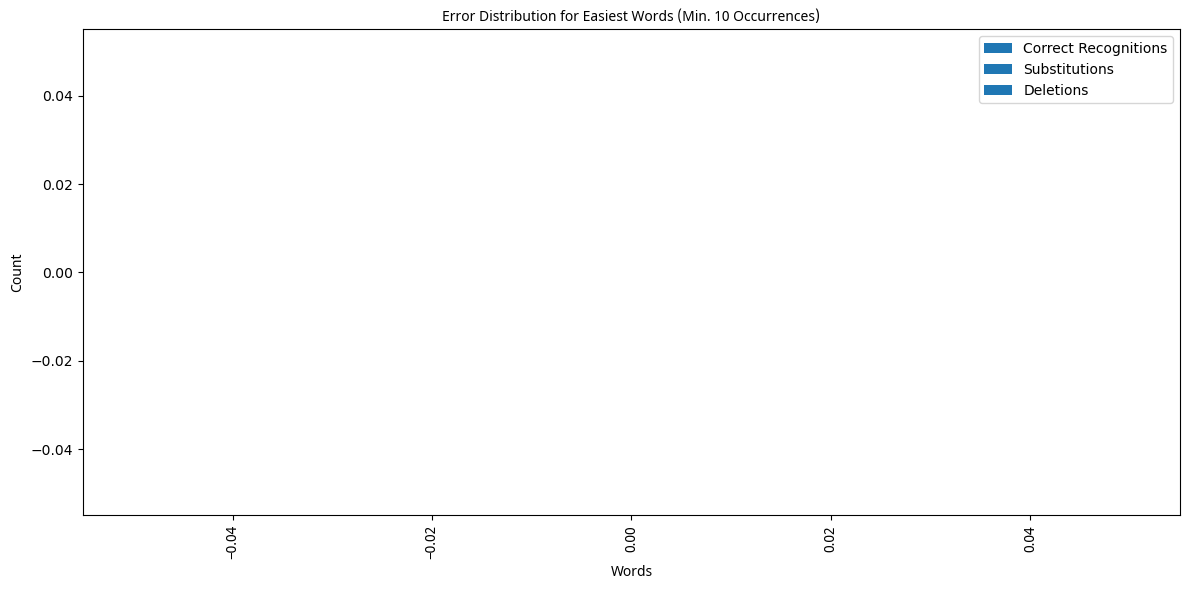

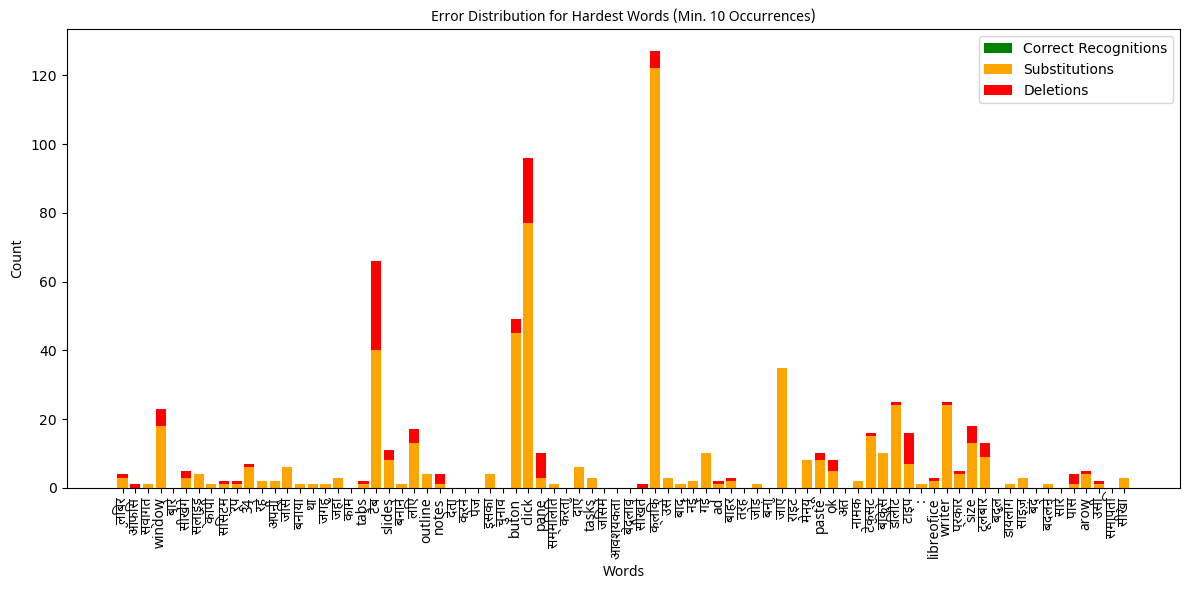

In [14]:
from collections import Counter
import jiwer
import matplotlib.pyplot as plt
from matplotlib import font_manager

# Specify the path to a Devanagari-compatible font (adjust path to the actual font location)
font_path = '/scratch/elec/puhe/p/palp3/MUCS/mucs_language_segregated_data/devanagri_font/NotoSansDevanagari-VariableFont_wdth,wght.ttf'  # Update with actual font path
prop = font_manager.FontProperties(fname=font_path)

# Assuming ref2 and pred2 are your lists of reference and hypothesis sentences

total_word_counts = Counter()       # Total occurrences of each word in references
correct_word_counts = Counter()     # Correctly recognized words
incorrect_word_counts = Counter()   # Incorrectly recognized words
# Initialize counters for errors
substitution_errors = Counter()
insertion_errors = Counter()
deletion_errors = Counter()

out = jiwer.process_words(ref2, pred2)

# Iterate over each sentence and its alignments
for ref_sentence, hyp_sentence, sentence_alignments in zip(ref2, pred2, out.alignments):
    # Tokenize sentences into words
    ref_words = ref_sentence.split()
    hyp_words = hyp_sentence.split()
    total_word_counts.update(ref_words)
    for alignment_chunk in sentence_alignments:
        operation = alignment_chunk.type  # 'equal', 'insert', 'delete', 'substitute'
        
        # Get start and end indices
        ref_start = alignment_chunk.ref_start_idx
        ref_end = alignment_chunk.ref_end_idx
        hyp_start = alignment_chunk.hyp_start_idx
        hyp_end = alignment_chunk.hyp_end_idx
        
        # Extract words based on indices
        ref_word = ' '.join(ref_words[ref_start:ref_end]) if ref_start < ref_end else None
        hyp_word = ' '.join(hyp_words[hyp_start:hyp_end]) if hyp_start < hyp_end else None

        # Count errors
        if operation == 'equal':
            correct_word_counts[ref_word] += 1
        if operation == 'substitute':
            substitution_errors[(ref_word, hyp_word)] += 1
            incorrect_word_counts[ref_word] += 1
        elif operation == 'delete':
            deletion_errors[ref_word] += 1
            incorrect_word_counts[ref_word] += 1
        elif operation == 'insert':
            insertion_errors[hyp_word] += 1

# Calculate word accuracy
word_accuracy = {}
for word in total_word_counts:
    correct = correct_word_counts.get(word, 0)
    total = total_word_counts[word]
    accuracy = correct / total if total > 0 else 0
    word_accuracy[word] = accuracy

# Separate easiest and hardest words with a minimum occurrence threshold of 10
min_occurrences = 10  # Minimum occurrences to filter rare words
easiest_words = [word for word, acc in word_accuracy.items() if acc >= 0.8 and total_word_counts[word] >= min_occurrences]
hardest_words = [(word, acc) for word, acc in word_accuracy.items() if total_word_counts[word] >= min_occurrences]
hardest_words.sort(key=lambda x: x[1])  # Sort by accuracy ascending

# Limit to the top 20 hardest words
hardest_words = [word for word, acc in hardest_words[:80]]

def plot_error_distribution(words, correct_counts, substitution_counts, deletion_counts, title):
    """Plot stacked bar chart for word error distribution."""
    plt.figure(figsize=(12, 6))
    
    plt.bar(words, correct_counts, label='Correct Recognitions', color='green')
    plt.bar(words, substitution_counts, bottom=correct_counts, label='Substitutions', color='orange')
    plt.bar(words, deletion_counts, bottom=[i+j for i,j in zip(correct_counts, substitution_counts)], label='Deletions', color='red')
    
    plt.xticks(rotation=90, fontproperties=prop)
    plt.ylabel('Count', fontproperties=prop)
    plt.xlabel('Words', fontproperties=prop)
    plt.title(title, fontproperties=prop)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Prepare data for the easiest words (minimum 10 occurrences)
correct_easiest = [correct_word_counts.get(word, 0) for word in easiest_words]
substitutions_easiest = [sum([count for (ref, hyp), count in substitution_errors.items() if ref == word]) for word in easiest_words]
deletions_easiest = [deletion_errors.get(word, 0) for word in easiest_words]

# Prepare data for the hardest words (minimum 10 occurrences)
correct_hardest = [correct_word_counts.get(word, 0) for word in hardest_words]
substitutions_hardest = [sum([count for (ref, hyp), count in substitution_errors.items() if ref == word]) for word in hardest_words]
deletions_hardest = [deletion_errors.get(word, 0) for word in hardest_words]

# Plot for easiest words
plot_error_distribution(easiest_words, correct_easiest, substitutions_easiest, deletions_easiest, 'Error Distribution for Easiest Words (Min. 10 Occurrences)')

# Plot for hardest words
plot_error_distribution(hardest_words, correct_hardest, substitutions_hardest, deletions_hardest, 'Error Distribution for Hardest Words (Min. 10 Occurrences)')


/tmp/ipykernel_1019212/3689075234.py:78: UserWarning: Glyph 8711 (\N{NABLA}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1019212/3689075234.py:78: UserWarning: Glyph 8709 (\N{EMPTY SET}) missing from current font.
  plt.tight_layout()
/appl/scibuilder-mamba/aalto-rhel9/prod/software/scicomp-python-env/2024-01/f56a564/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8711 (\N{NABLA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/appl/scibuilder-mamba/aalto-rhel9/prod/software/scicomp-python-env/2024-01/f56a564/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8709 (\N{EMPTY SET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


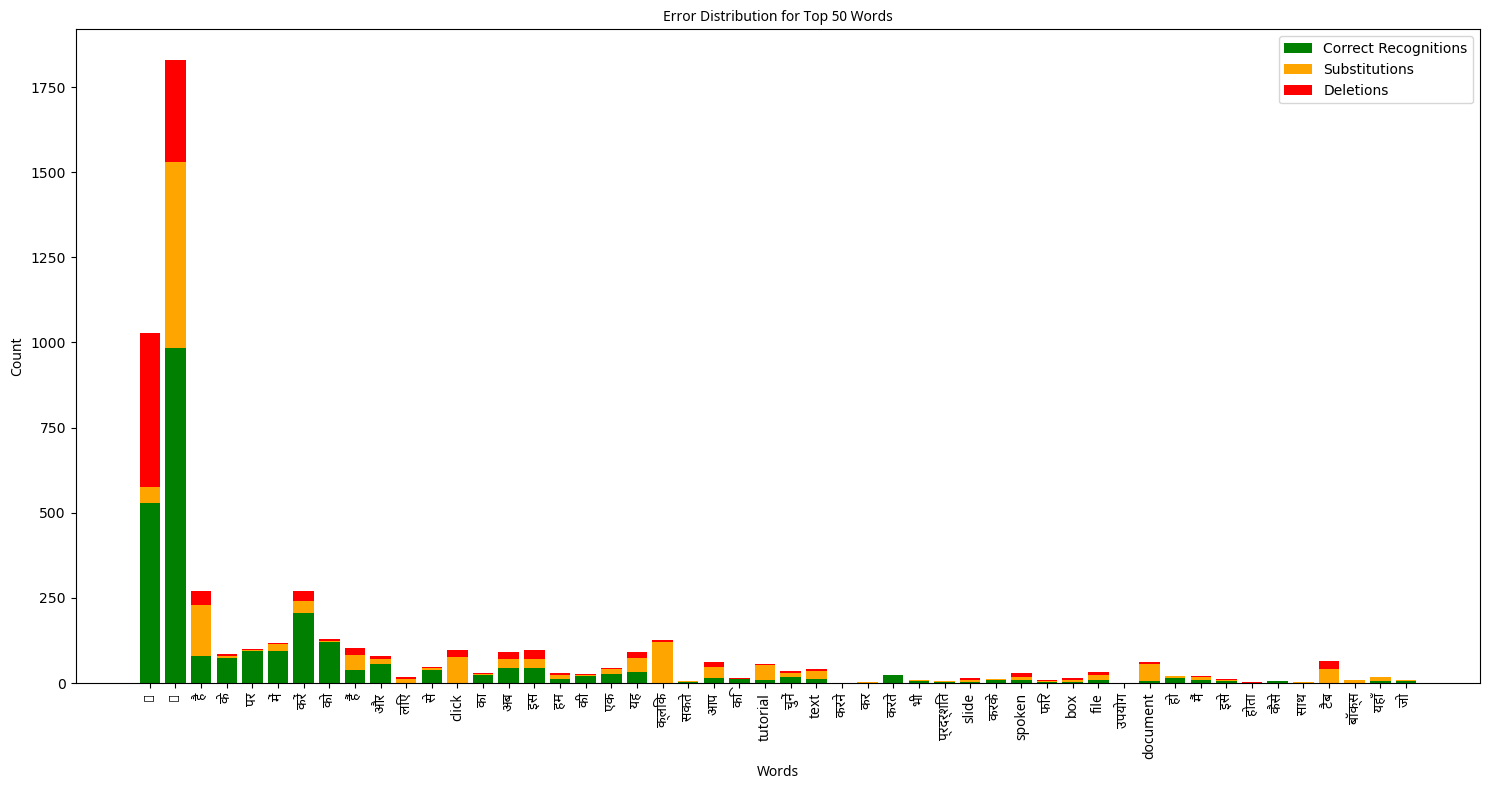

In [15]:
from collections import Counter
import jiwer
import matplotlib.pyplot as plt
from matplotlib import font_manager

# Specify the path to a Devanagari-compatible font, like 'Noto Sans Devanagari'
# Adjust the path if needed based on where you install the font
font_path = '/scratch/elec/puhe/p/palp3/MUCS/mucs_language_segregated_data/devanagri_font/NotoSansDevanagari-VariableFont_wdth,wght.ttf'  # Update with actual font path
prop = font_manager.FontProperties(fname=font_path)

# Assuming ref2 and pred2 are your lists of reference and hypothesis sentences

total_word_counts = Counter()       # Total occurrences of each word in references
correct_word_counts = Counter()     # Correctly recognized words
incorrect_word_counts = Counter()   # Incorrectly recognized words
# Initialize counters for errors
substitution_errors = Counter()
insertion_errors = Counter()
deletion_errors = Counter()

out = jiwer.process_words(ref2, pred2)

# Iterate over each sentence and its alignments
for ref_sentence, hyp_sentence, sentence_alignments in zip(ref2, pred2, out.alignments):
    # Tokenize sentences into words
    ref_words = ref_sentence.split()
    hyp_words = hyp_sentence.split()
    total_word_counts.update(ref_words)
    for alignment_chunk in sentence_alignments:
        operation = alignment_chunk.type  # 'equal', 'insert', 'delete', 'substitute'
        
        # Get start and end indices
        ref_start = alignment_chunk.ref_start_idx
        ref_end = alignment_chunk.ref_end_idx
        hyp_start = alignment_chunk.hyp_start_idx
        hyp_end = alignment_chunk.hyp_end_idx
        
        # Extract words based on indices
        ref_word = ' '.join(ref_words[ref_start:ref_end]) if ref_start < ref_end else None
        hyp_word = ' '.join(hyp_words[hyp_start:hyp_end]) if hyp_start < hyp_end else None

        # Count errors
        if operation == 'equal':
            # Correctly recognized word
            correct_word_counts[ref_word] += 1
        if operation == 'substitute':
            substitution_errors[(ref_word, hyp_word)] += 1
            incorrect_word_counts[ref_word] += 1
        elif operation == 'delete':
            deletion_errors[ref_word] += 1
            incorrect_word_counts[ref_word] += 1
        elif operation == 'insert':
            insertion_errors[hyp_word] += 1

# Prepare data for the top 50 words based on occurrences
top_50_words = total_word_counts.most_common(50)

# Prepare lists for visualization
words = [word for word, count in top_50_words]
correct = [correct_word_counts.get(word, 0) for word in words]
substitutions = [sum([count for (ref, hyp), count in substitution_errors.items() if ref == word]) for word in words]
deletions = [deletion_errors.get(word, 0) for word in words]

# Plot the stacked bar chart
plt.figure(figsize=(15, 8))

plt.bar(words, correct, label='Correct Recognitions', color='green')
plt.bar(words, substitutions, bottom=correct, label='Substitutions', color='orange')
plt.bar(words, deletions, bottom=[i+j for i,j in zip(correct, substitutions)], label='Deletions', color='red')

# Set the font for x-axis tick labels
plt.xticks(rotation=90, fontproperties=prop)
plt.ylabel('Count', fontproperties=prop)
plt.xlabel('Words', fontproperties=prop)
plt.title('Error Distribution for Top 50 Words', fontproperties=prop)
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from matplotlib import font_manager

# Load the specific fonts for Devanagari and general symbols
devanagari_font_path = '/scratch/elec/puhe/p/palp3/MUCS/mucs_language_segregated_data/devanagri_font/NotoSansDevanagari-VariableFont_wdth,wght.ttf'
symbol_font = 'DejaVu Sans'  # Default font for symbols

# Create font properties objects
prop_devanagari = font_manager.FontProperties(fname=devanagari_font_path)
prop_symbols = font_manager.FontProperties(family=symbol_font)


/tmp/ipykernel_1019212/1736300265.py:108: UserWarning: Glyph 8711 (\N{NABLA}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1019212/1736300265.py:108: UserWarning: Glyph 8709 (\N{EMPTY SET}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1019212/1736300265.py:108: UserWarning: Glyph 2361 (\N{DEVANAGARI LETTER HA}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1019212/1736300265.py:108: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
/tmp/ipykernel_1019212/1736300265.py:108: UserWarning: Glyph 2376 (\N{DEVANAGARI VOWEL SIGN AI}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1019212/1736300265.py:108: UserWarning: Glyph 2306 (\N{DEVANAGARI SIGN ANUSVARA}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1019212/1736300265.py:108: UserWarning: Glyph 2311 (\N{DEVANAGARI LETTER I}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1019212/1736300265.py:1

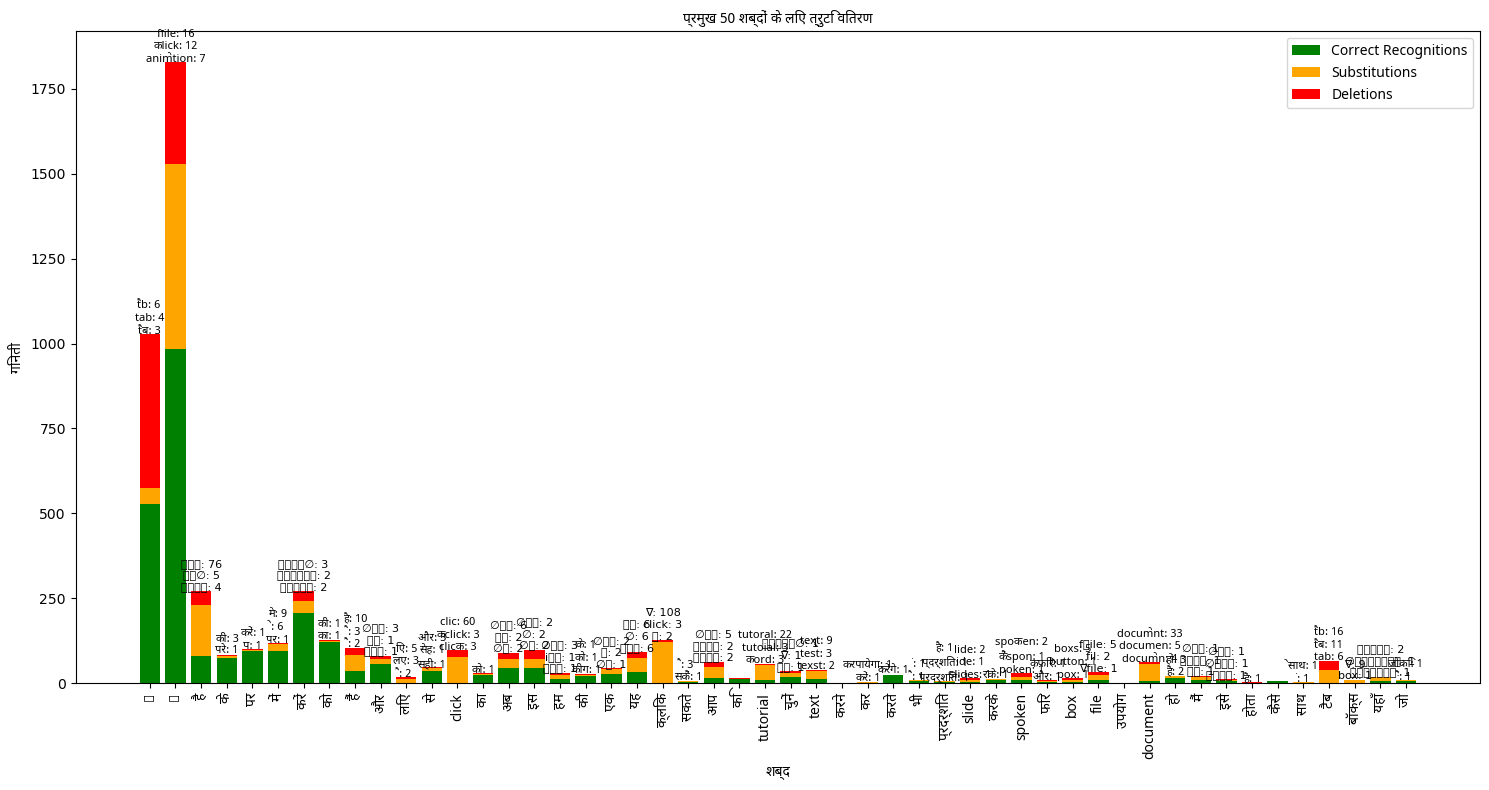

In [18]:
from collections import Counter
import jiwer
import matplotlib.pyplot as plt
from matplotlib import font_manager

# Specify the path to a Devanagari-compatible font, like 'Noto Sans Devanagari'
# Adjust the path if needed based on where you install the font
devanagari_font_path = '/scratch/elec/puhe/p/palp3/MUCS/mucs_language_segregated_data/devanagri_font/NotoSansDevanagari-VariableFont_wdth,wght.ttf'
symbol_font = 'DejaVu Sans'  # Default font for symbols

# Create font properties objects
prop_devanagari = font_manager.FontProperties(fname=devanagari_font_path)
prop_symbols = font_manager.FontProperties(family=symbol_font)

# Assuming ref2 and pred2 are your lists of reference and hypothesis sentences
total_word_counts = Counter()       # Total occurrences of each word in references
correct_word_counts = Counter()     # Correctly recognized words
incorrect_word_counts = Counter()   # Incorrectly recognized words
# Initialize counters for errors
substitution_errors = Counter()
insertion_errors = Counter()
deletion_errors = Counter()

# Process word-level alignments using jiwer
out = jiwer.process_words(ref2, pred2)

# Iterate over each sentence and its alignments
for ref_sentence, hyp_sentence, sentence_alignments in zip(ref2, pred2, out.alignments):
    # Tokenize sentences into words
    ref_words = ref_sentence.split()
    hyp_words = hyp_sentence.split()
    total_word_counts.update(ref_words)
    for alignment_chunk in sentence_alignments:
        operation = alignment_chunk.type  # 'equal', 'insert', 'delete', 'substitute'
        
        # Get start and end indices
        ref_start = alignment_chunk.ref_start_idx
        ref_end = alignment_chunk.ref_end_idx
        hyp_start = alignment_chunk.hyp_start_idx
        hyp_end = alignment_chunk.hyp_end_idx
        
        # Extract words based on indices
        ref_word = ' '.join(ref_words[ref_start:ref_end]) if ref_start < ref_end else None
        hyp_word = ' '.join(hyp_words[hyp_start:hyp_end]) if hyp_start < hyp_end else None

        # Count errors
        if operation == 'equal':
            # Correctly recognized word
            correct_word_counts[ref_word] += 1
        if operation == 'substitute':
            substitution_errors[(ref_word, hyp_word)] += 1
            incorrect_word_counts[ref_word] += 1
        elif operation == 'delete':
            deletion_errors[ref_word] += 1
            incorrect_word_counts[ref_word] += 1
        elif operation == 'insert':
            insertion_errors[hyp_word] += 1

# Prepare data for the top 50 words based on occurrences
top_50_words = total_word_counts.most_common(50)

# Prepare lists for visualization
words = [word for word, count in top_50_words]
correct = [correct_word_counts.get(word, 0) for word in words]
substitutions = [sum([count for (ref, hyp), count in substitution_errors.items() if ref == word]) for word in words]
deletions = [deletion_errors.get(word, 0) for word in words]

# Plot the stacked bar chart
plt.figure(figsize=(15, 8))

plt.bar(words, correct, label='Correct Recognitions', color='green')
plt.bar(words, substitutions, bottom=correct, label='Substitutions', color='orange')
plt.bar(words, deletions, bottom=[i+j for i, j in zip(correct, substitutions)], label='Deletions', color='red')

# Set x-axis labels to use the Devanagari font where applicable
plt.xticks(rotation=90, fontproperties=prop_devanagari)

# Annotate the top 3 substitutions for each word on the substitution bars
for i, word in enumerate(words):
    # Get top 3 substitutions for the current word
    top_substitutions = [(hyp, count) for (ref, hyp), count in substitution_errors.items() if ref == word]
    top_substitutions = sorted(top_substitutions, key=lambda x: x[1], reverse=True)[:3]
    
    # Prepare the annotation text, using DejaVu Sans for symbols
    annotation_text = '\n'.join([f"{hyp}: {count}" for hyp, count in top_substitutions])
    
    # Annotate only if there are substitutions
    if substitutions[i] > 0:
        plt.text(
            i, 
            correct[i] + substitutions[i] + deletions[i] + 1, 
            annotation_text, 
            ha='center', 
            fontproperties=prop_devanagari if not any(sym in annotation_text for sym in ['∅', '∇']) else prop_symbols, 
            fontsize=8
        )

#plt.xticks(rotation=90, fontproperties=prop)
#plt.ylabel('Count', fontproperties=prop)
#plt.xlabel('Words', fontproperties=prop)
#plt.title('Error Distribution for Top 50 Words', fontproperties=prop)
# Set labels and title with Devanagari font for consistency
plt.ylabel('गिनती', fontproperties=prop_devanagari)  # Example: "Count" in Hindi
plt.xlabel('शब्द', fontproperties=prop_devanagari)  # Example: "Words" in Hindi
plt.title('प्रमुख 50 शब्दों के लिए त्रुटि वितरण', fontproperties=prop_devanagari)  # Example: "Error Distribution for Top 50 Words" in Hindi
plt.legend(prop=prop_devanagari)

plt.tight_layout()
plt.show()


['∇', '∅', 'है', 'के', 'पर', 'में', 'करें', 'को', 'हैं', 'और', 'लिए', 'से', 'click', 'का', 'अब', 'इस', 'हम', 'की', 'एक', 'यह', 'क्लिक', 'सकते', 'आप', 'कि', 'tutorial', 'चुनें', 'text', 'करने', 'कर', 'करते', 'भी', 'प्रदर्शित', 'slide', 'करके', 'spoken', 'फिर', 'box', 'file', 'उपयोग', 'document', 'हो', 'मैं', 'इसे', 'होता', 'कैसे', 'साथ', 'टैब', 'बॉक्स', 'यहाँ', 'जो']


/tmp/ipykernel_1019212/1985233906.py:92: UserWarning: Glyph 8711 (\N{NABLA}) missing from current font.
  plt.savefig('error_distribution.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
/tmp/ipykernel_1019212/1985233906.py:92: UserWarning: Glyph 8709 (\N{EMPTY SET}) missing from current font.
  plt.savefig('error_distribution.png', dpi=300, bbox_inches='tight', pad_inches=0.1)


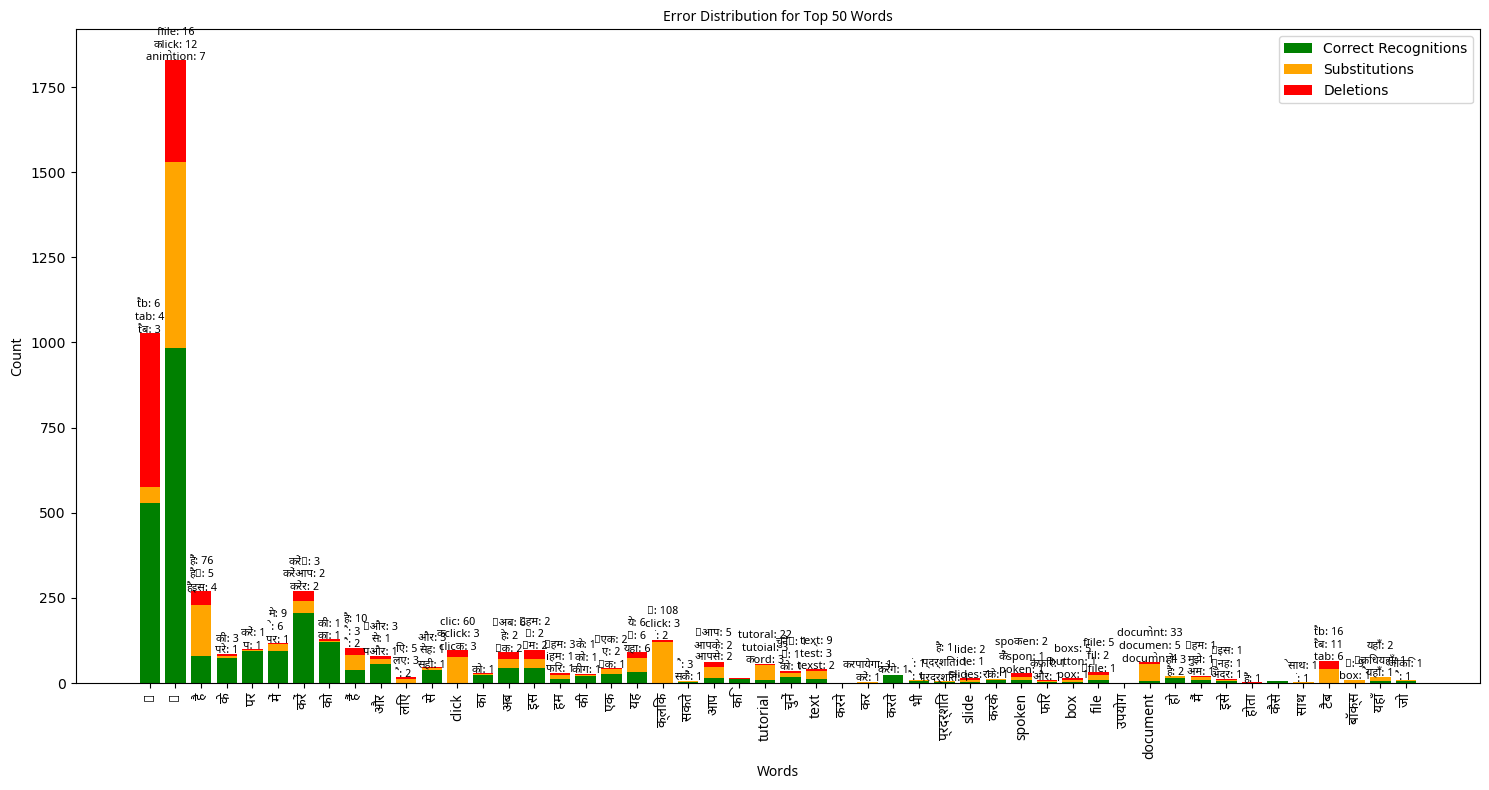

In [20]:
from collections import Counter
import jiwer
import matplotlib.pyplot as plt
from matplotlib import font_manager

# Specify the path to a Devanagari-compatible font, like 'Noto Sans Devanagari'
# Adjust the path if needed based on where you install the font
font_path = '/scratch/elec/puhe/p/palp3/MUCS/mucs_language_segregated_data/devanagri_font/NotoSansDevanagari-VariableFont_wdth,wght.ttf'  # Update with actual font path
prop = font_manager.FontProperties(fname=font_path)

# Assuming ref2 and pred2 are your lists of reference and hypothesis sentences

total_word_counts = Counter()       # Total occurrences of each word in references
correct_word_counts = Counter()     # Correctly recognized words
incorrect_word_counts = Counter()   # Incorrectly recognized words
# Initialize counters for errors
substitution_errors = Counter()
insertion_errors = Counter()
deletion_errors = Counter()

out = jiwer.process_words(ref2, pred2)

# Iterate over each sentence and its alignments
for ref_sentence, hyp_sentence, sentence_alignments in zip(ref2, pred2, out.alignments):
    # Tokenize sentences into words
    ref_words = ref_sentence.split()
    hyp_words = hyp_sentence.split()
    total_word_counts.update(ref_words)
    for alignment_chunk in sentence_alignments:
        operation = alignment_chunk.type  # 'equal', 'insert', 'delete', 'substitute'
        
        # Get start and end indices
        ref_start = alignment_chunk.ref_start_idx
        ref_end = alignment_chunk.ref_end_idx
        hyp_start = alignment_chunk.hyp_start_idx
        hyp_end = alignment_chunk.hyp_end_idx
        
        # Extract words based on indices
        ref_word = ' '.join(ref_words[ref_start:ref_end]) if ref_start < ref_end else None
        hyp_word = ' '.join(hyp_words[hyp_start:hyp_end]) if hyp_start < hyp_end else None

        # Count errors
        if operation == 'equal':
            # Correctly recognized word
            correct_word_counts[ref_word] += 1
        if operation == 'substitute':
            substitution_errors[(ref_word, hyp_word)] += 1
            incorrect_word_counts[ref_word] += 1
        elif operation == 'delete':
            deletion_errors[ref_word] += 1
            incorrect_word_counts[ref_word] += 1
        elif operation == 'insert':
            insertion_errors[hyp_word] += 1

# Prepare data for the top 50 words based on occurrences
top_50_words = total_word_counts.most_common(50)

# Prepare lists for visualization
words = [word for word, count in top_50_words]
print(words)
correct = [correct_word_counts.get(word, 0) for word in words]
substitutions = [sum([count for (ref, hyp), count in substitution_errors.items() if ref == word]) for word in words]
deletions = [deletion_errors.get(word, 0) for word in words]

# Plot the stacked bar chart
plt.figure(figsize=(15, 8))

plt.bar(words, correct, label='Correct Recognitions', color='green')
plt.bar(words, substitutions, bottom=correct, label='Substitutions', color='orange')
plt.bar(words, deletions, bottom=[i+j for i,j in zip(correct, substitutions)], label='Deletions', color='red')

# Annotate the top 3 substitutions for each word on the substitution bars
for i, word in enumerate(words):
    # Get top 3 substitutions for the current word
    top_substitutions = [(hyp, count) for (ref, hyp), count in substitution_errors.items() if ref == word]
    top_substitutions = sorted(top_substitutions, key=lambda x: x[1], reverse=True)[:3]
    
    # Prepare the annotation text
    annotation_text = '\n'.join([f"{hyp}: {count}" for hyp, count in top_substitutions])
    
    # Annotate only if there are substitutions
    if substitutions[i] > 0:
        plt.text(i, correct[i] + substitutions[i] + deletions[i] + 1, annotation_text, ha='center', fontproperties=prop, fontsize=8)

# Set the font for x-axis tick labels
plt.xticks(rotation=90, fontproperties=prop)
plt.ylabel('Count', fontproperties=prop)
plt.xlabel('Words', fontproperties=prop)
plt.title('Error Distribution for Top 50 Words', fontproperties=prop)
plt.legend()

plt.savefig('error_distribution.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.tight_layout()
plt.show()
# Save the plot as an image file before displaying it




In [128]:
from collections import Counter, defaultdict
import jiwer
import pandas as pd  # Import pandas for DataFrame operations

# Assuming ref2 and pred2 are your lists of reference and hypothesis sentences

total_word_counts = Counter()       # Total occurrences of each word in references
correct_word_counts = Counter()     # Correctly recognized words
incorrect_word_counts = Counter()   # Incorrectly recognized words

# Initialize counters for errors
substitution_errors = Counter()
insertion_errors = Counter()
deletion_errors = Counter()

# Initialize dictionaries to collect substituted words
substituted_words_counts = defaultdict(lambda: Counter())

# Process the alignments using jiwer
out = jiwer.process_words(ref2, pred2)

# Iterate over each sentence and its alignments
for ref_sentence, hyp_sentence, sentence_alignments in zip(ref2, pred2, out.alignments):
    # Tokenize sentences into words
    ref_words = ref_sentence.split()
    hyp_words = hyp_sentence.split()
    total_word_counts.update(ref_words)
    for alignment_chunk in sentence_alignments:
        operation = alignment_chunk.type  # 'equal', 'insert', 'delete', 'substitute'

        # Get start and end indices
        ref_start = alignment_chunk.ref_start_idx
        ref_end = alignment_chunk.ref_end_idx
        hyp_start = alignment_chunk.hyp_start_idx
        hyp_end = alignment_chunk.hyp_end_idx

        # Extract words based on indices
        ref_word = ' '.join(ref_words[ref_start:ref_end]) if ref_start < ref_end else None
        hyp_word = ' '.join(hyp_words[hyp_start:hyp_end]) if hyp_start < hyp_end else None

        # Count errors
        if operation == 'equal':
            # Correctly recognized word
            correct_word_counts[ref_word] += 1
        elif operation == 'substitute':
            substitution_errors[(ref_word, hyp_word)] += 1
            incorrect_word_counts[ref_word] += 1
            substituted_words_counts[ref_word][hyp_word] += 1
        elif operation == 'delete':
            deletion_errors[ref_word] += 1
            incorrect_word_counts[ref_word] += 1
        elif operation == 'insert':
            insertion_errors[hyp_word] += 1  # Insertion errors are not linked to a specific reference word

# Calculate word accuracy and prepare data for DataFrame
word_data = []
for word in total_word_counts:
    correct = correct_word_counts.get(word, 0)
    incorrect = incorrect_word_counts.get(word, 0)
    total = total_word_counts[word]
    accuracy = correct / total if total > 0 else 0
    substitutions = sum(count for (ref_word, hyp_word), count in substitution_errors.items() if ref_word == word)
    deletions = deletion_errors.get(word, 0)

    # Get the most common substitutions for the word
    substitutions_counter = substituted_words_counts.get(word, Counter())
    most_common_substitutions = substitutions_counter.most_common(3)  # Get top 3 substitutions
    substitutions_str = ', '.join([f"{w} ({c} times)" for w, c in most_common_substitutions])

    word_data.append({
        'Word': word,
        'Total Occurrences': total,
        'Correct Recognitions': correct,
        'Incorrect Recognitions': incorrect,
        'Accuracy': accuracy,
        'Substitutions': substitutions,
        'Deletions': deletions,
        'Most Common Substitutions': substitutions_str
    })

# Create DataFrame
df = pd.DataFrame(word_data)

# Sort DataFrame by Accuracy (ascending)
df = df.sort_values(by='Accuracy', ascending=True)

# Reset index
df = df.reset_index(drop=True)

# Display DataFrame
print(df)

# Optionally, save DataFrame to CSV
df.to_csv('word_recognition_analysis.csv', index=False)


          Word  Total Occurrences  Correct Recognitions  \
0         लिबर                 50                     0   
1       स्थिति                  3                     0   
2        बढ़ता                  1                     0   
3      प्रारंभ                  1                     0   
4        देखता                  1                     0   
...        ...                ...                   ...   
3315  instaled                  1                     1   
3316     metal                  1                     1   
3317    global                  1                     1   
3318     spoke                  1                     1   
3319   पत्रिका                  1                     1   

      Incorrect Recognitions  Accuracy  Substitutions  Deletions  \
0                          4       0.0              3          1   
1                          0       0.0              0          0   
2                          0       0.0              0          0   
3                  

In [135]:
from collections import Counter, defaultdict
import jiwer
import pandas as pd  # Import pandas for DataFrame operations

# Assuming ref2 and pred2 are your lists of reference and hypothesis sentences

total_word_counts = Counter()       # Total occurrences of each word in references
correct_word_counts = Counter()     # Correctly recognized words
incorrect_word_counts = Counter()   # Incorrectly recognized words

# Initialize counters for errors
substitution_errors = Counter()
insertion_errors = Counter()
deletion_errors = Counter()

# Initialize substituted_words_counts as a defaultdict of Counters
substituted_words_counts = defaultdict(Counter)

out = jiwer.process_words(ref, pred)

# Iterate over each sentence and its alignments
for ref_sentence, hyp_sentence, sentence_alignments in zip(ref, pred, out.alignments):
    # Tokenize sentences into words
    ref_words = ref_sentence.split()
    hyp_words = hyp_sentence.split()
    total_word_counts.update(ref_words)
    for alignment_chunk in sentence_alignments:
        operation = alignment_chunk.type  # 'equal', 'insert', 'delete', 'substitute'

        # Get start and end indices
        ref_start = alignment_chunk.ref_start_idx
        ref_end = alignment_chunk.ref_end_idx
        hyp_start = alignment_chunk.hyp_start_idx
        hyp_end = alignment_chunk.hyp_end_idx

        # Extract words based on indices
        ref_tokens = ref_words[ref_start:ref_end]
        hyp_tokens = hyp_words[hyp_start:hyp_end]

        if operation == 'equal':
            # Correctly recognized words
            for ref_word in ref_tokens:
                correct_word_counts[ref_word] += 1
        elif operation == 'substitute':
            # Substituted words
            for ref_word, hyp_word in zip(ref_tokens, hyp_tokens):
                substitution_errors[(ref_word, hyp_word)] += 1
                incorrect_word_counts[ref_word] += 1
                # Collect substituted words
                substituted_words_counts[ref_word][hyp_word] += 1
        elif operation == 'delete':
            # Deleted words
            for ref_word in ref_tokens:
                deletion_errors[ref_word] += 1
                incorrect_word_counts[ref_word] += 1
        elif operation == 'insert':
            # Inserted words
            for hyp_word in hyp_tokens:
                insertion_errors[hyp_word] += 1

# Now, total_word_counts should equal correct_word_counts + incorrect_word_counts for each word

# Build the DataFrame
word_data = []
for word in total_word_counts:
    total = total_word_counts[word]
    correct = correct_word_counts.get(word, 0)
    incorrect = incorrect_word_counts.get(word, 0)
    if total != correct + incorrect:
        print(f"Discrepancy for word '{word}': total {total}, correct {correct}, incorrect {incorrect}")
    accuracy = correct / total if total > 0 else 0
    substitutions = sum(count for (ref_word, hyp_word), count in substitution_errors.items() if ref_word == word)
    deletions = deletion_errors.get(word, 0)

    # Collect the most common substitutions
    common_substitutions = substituted_words_counts[word].most_common(3)
    common_substitutions_str = ', '.join([f"{hyp_word} ({count} times)" for hyp_word, count in common_substitutions])

    word_data.append({
        'Word': word,
        'Total Occurrences': total,
        'Correct Recognitions': correct,
        'Incorrect Recognitions': incorrect,
        'Accuracy': accuracy,
        'Substitutions': substitutions,
        'Deletions': deletions,
        'Most Common Substitutions': common_substitutions_str
    })

# Create DataFrame
df = pd.DataFrame(word_data)

# Sort DataFrame by Accuracy (ascending)
df = df.sort_values(by='Accuracy', ascending=True).reset_index(drop=True)

# Display DataFrame
print(df)

# Optionally, save DataFrame to CSV
df.to_csv('word_recognition_analysis_oldtags.csv', index=False)


              Word  Total Occurrences  Correct Recognitions  \
0             लिबर                 50                     0   
1     पुनव्यवस्थित                  1                     0   
2          डाउनलोड                 10                     0   
3           वीडियो                  3                     0   
4             सावल                  2                     0   
...            ...                ...                   ...   
3315       प्रकाशन                  1                     1   
3316      ग्राहकों                  1                     1   
3317        नियमित                  1                     1   
3318       निकालना                  1                     1   
3319           खोल                  5                     5   

      Incorrect Recognitions  Accuracy  Substitutions  Deletions  \
0                         50       0.0             46          4   
1                          1       0.0              1          0   
2                         10       0.0 

In [115]:

from collections import Counter
import jiwer
from itertools import chain

# Process words to get alignments
out = jiwer.process_words(ref2, pred2)
#alignments_nested = out.alignments

# Flatten the alignments
#alignments = list(chain.from_iterable(alignments_nested))

# Initialize counters
substitution_errors = Counter()
insertion_errors = Counter()
deletion_errors = Counter()

# Iterate over alignments
for alignment in alignments:
    print(alignment)
    operation = alignment.type
    ref_word = alignment.references
    hyp_word = alignment.hypotheses

    if operation == 'substitute':
        substitution_errors[(ref_word, hyp_word)] += 1
    elif operation == 'delete':
        deletion_errors[ref_word] += 1
    elif operation == 'insert':
        insertion_errors[hyp_word] += 1

# Display the results
print("Top substitutions:")
for (ref_word, hyp_word), count in substitution_errors.most_common():
    print(f"'{ref_word}' was misrecognized as '{hyp_word}' {count} times")

print("\nTop deletions:")
for word, count in deletion_errors.most_common():
    print(f"'{word}' was deleted {count} times")

print("\nTop insertions:")
for word, count in insertion_errors.most_common():
    print(f"'{word}' was inserted {count} times")


AlignmentChunk(type='substitute', ref_start_idx=0, ref_end_idx=3, hyp_start_idx=0, hyp_end_idx=3)


AttributeError: 'AlignmentChunk' object has no attribute 'references'

In [95]:
out = jiwer.process_words(ref2, pred2)

# Initialize counters for errors
substitution_errors = Counter()
insertion_errors = Counter()
deletion_errors = Counter()

# Iterate over each sentence and its alignments
for idx, (alignment_chunks, ref_words, hyp_words) in enumerate(zip(out.alignments, out.truth, out.hypothesis)):
    # Ensure that ref_words and hyp_words are lists
    if isinstance(ref_words, str):
        ref_words = ref_words.split()
    if isinstance(hyp_words, str):
        hyp_words = hyp_words.split()

    for alignment in alignment_chunks:
        operation = alignment.type  # 'equal', 'insert', 'delete', 'substitute'

        # Get start and end indices
        ref_start = alignment.ref_start_idx
        ref_end = alignment.ref_end_idx
        hyp_start = alignment.hyp_start_idx
        hyp_end = alignment.hyp_end_idx

        # Extract words based on indices
        ref_word = ' '.join(ref_words[ref_start:ref_end]) if ref_start < ref_end else None
        hyp_word = ' '.join(hyp_words[hyp_start:hyp_end]) if hyp_start < hyp_end else None

        if operation == 'substitute':
            substitution_errors[(ref_word, hyp_word)] += 1
        elif operation == 'delete':
            deletion_errors[ref_word] += 1
        elif operation == 'insert':
            insertion_errors[hyp_word] += 1
        # 'equal' indicates correct words and can be ignored

# Display the top substitutions
print("Top substitutions:")
for (ref_word, hyp_word), count in substitution_errors.most_common(20):
    print(f"'{ref_word}' was misrecognized as '{hyp_word}' {count} times")

# Display the top deletions
print("\nTop deletions:")
for word, count in deletion_errors.most_common(20):
    print(f"'{word}' was deleted {count} times")

# Display the top insertions
print("\nTop insertions:")
for word, count in insertion_errors.most_common(20):
    print(f"'{word}' was inserted {count} times")

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



AttributeError: 'WordOutput' object has no attribute 'truth'

In [91]:
from itertools import chain

# Process words to get alignments
out = jiwer.process_words(ref2, pred2)
alignments_nested = out.alignments  # List of lists

# Flatten the alignments
alignments = list(chain.from_iterable(alignments_nested))

# Initialize counters
substitution_errors = Counter()
insertion_errors = Counter()
deletion_errors = Counter()

# Iterate over alignments
for alignment in alignments:
    operation = alignment.operation
    ref_word = alignment.reference
    hyp_word = alignment.hypothesis

    if operation == 'substitution':
        substitution_errors[(ref_word, hyp_word)] += 1
    elif operation == 'deletion':
        deletion_errors[ref_word] += 1
    elif operation == 'insertion':
        insertion_errors[hyp_word] += 1

# Display the results
print("Top substitutions:")
for (ref_word, hyp_word), count in substitution_errors.most_common():
    print(f"'{ref_word}' was misrecognized as '{hyp_word}' {count} times")

print("\nTop deletions:")
for word, count in deletion_errors.most_common():
    print(f"'{word}' was deleted {count} times")

print("\nTop insertions:")
for word, count in insertion_errors.most_common():
    print(f"'{word}' was inserted {count} times")


AttributeError: 'AlignmentChunk' object has no attribute 'operation'

In [83]:
import jiwer
from collections import Counter

def get_alignment_details(ref, hyp):
    # Define the transformation
    transformation = jiwer.Compose([
        jiwer.ToLowerCase(),
        jiwer.RemovePunctuation(),
        jiwer.Strip(),
        jiwer.RemoveMultipleSpaces(),
    ])
    
    # Transform references and hypotheses
    ref_transformed = transformation(ref)
    hyp_transformed = transformation(hyp)
    
    # Split into words
    ref_words = ref_transformed.split()
    hyp_words = hyp_transformed.split()
    
    # Compute measures with alignment
    measures = jiwer.compute_measures(ref_words, hyp_words)
    
    # Get alignment operations
    alignment_ops = measures['ops'][0]  # Since 'ops' is a list of lists
    ref_word_list = measures['truth'][0]        # List of reference words
    hyp_word_list = measures['hypothesis'][0]   # List of hypothesis words
    
    # Initialize indices
    ref_idx = 0
    hyp_idx = 0
    
    alignment = []
    
    for op in alignment_ops:
        op_type = op.type
        ref_start = op.ref_start_idx
        ref_end = op.ref_end_idx
        hyp_start = op.hyp_start_idx
        hyp_end = op.hyp_end_idx
        
        ref_words_segment = ref_word_list[ref_start:ref_end]
        hyp_words_segment = hyp_word_list[hyp_start:hyp_end]
        
        ref_word = ' '.join(ref_words_segment) if ref_words_segment else None
        hyp_word = ' '.join(hyp_words_segment) if hyp_words_segment else None
        
        if op_type == 'equal':
            alignment.append(('correct', ref_word, hyp_word))
        elif op_type == 'insert':
            alignment.append(('insertion', None, hyp_word))
        elif op_type == 'delete':
            alignment.append(('deletion', ref_word, None))
        elif op_type == 'substitute':
            alignment.append(('substitution', ref_word, hyp_word))
    
    return alignment

# Initialize error counters
substitution_errors = []
insertion_errors = []
deletion_errors = []

for ref, hyp in zip(ref2, pred2):
    visualize_alignment(
    output, show_measures=True, skip_correct=True)
    alignment = get_alignment_details(ref, hyp)
    
    for error_type, ref_word, hyp_word in alignment:
        if error_type == 'substitution':
            substitution_errors.append((ref_word, hyp_word))
        elif error_type == 'deletion':
            deletion_errors.append(ref_word)
        elif error_type == 'insertion':
            insertion_errors.append(hyp_word)
        # Correct words can be ignored

# Count and display substitutions
substitution_counter = Counter(substitution_errors)

print("Most common substitutions:")
for (ref_word, hyp_word), count in substitution_counter.most_common():
    print(f"'{ref_word}' was misrecognized as '{hyp_word}' {count} times")

# Count and display deletions
deletion_counter = Counter(deletion_errors)

print("\nMost common deletions:")
for word, count in deletion_counter.most_common():
    print(f"'{word}' was deleted {count} times")

# Count and display insertions
insertion_counter = Counter(insertion_errors)

print("\nMost common insertions:")
for word, count in insertion_counter.most_common():
    print(f"'{word}' was inserted {count} times")


ValueError: After applying the transforms on the reference and hypothesis sentences, their lengths must match. Instead got 27 reference and 24 hypothesis sentences.